In [ ]:
# Importandando as bibliotecas

from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Criando uma conexão spark
spark = SparkSession.builder.appName('Análise de funcionários').getOrCreate()

In [ ]:
# Importandando um arquivo CSV
dados = pd.read_csv('/content/Funcionarios.csv')

df_panda = pd.DataFrame(dados)

spark_df = spark.createDataFrame(df_panda)

spark_df.show()

+---+----------------+-----+--------------------+--------------------+---------+--------------+--------------+
| Id|nome funcionario|idade|            endereco|               cargo|  salario|datanascimento|ferias vencida|
+---+----------------+-----+--------------------+--------------------+---------+--------------+--------------+
|  1|   Lauren Gordon|   32|2854 Brooks Ramp ...|Development worke...|115897.44|    1992-07-28|         false|
|  2|  Carol Phillips|   45|192 Sarah Common ...|               Actor| 98586.29|    1979-01-19|         false|
|  3|       Ian Mayer|   38|638 Alvarez Squar...|Education adminis...|116251.84|    2004-04-21|          true|
|  4|   Patrick Brown|   37|792 Mcdonald Unio...| Broadcast presenter|105273.76|    1964-03-25|         false|
|  5|  Elizabeth Bell|   59|89831 Montes Fork...| Dispensing optician| 94982.32|    1979-02-26|         false|
|  6| Kimberly Lawson|   42|078 Preston Via A...|        Tree surgeon|105298.63|    2000-09-18|         false|
|

In [ ]:
# Contagem de pessoa por idade
idade_contagem = spark_df.groupBy('idade').count().orderBy('idade', ascending=True)
idade_contagem.show()

+-----+-----+
|idade|count|
+-----+-----+
|   27|    1|
|   28|    3|
|   29|    3|
|   30|    3|
|   31|    3|
|   32|    2|
|   33|    3|
|   34|    1|
|   35|    2|
|   36|    3|
|   37|    3|
|   38|    2|
|   39|    3|
|   40|    2|
|   41|    1|
|   42|    3|
|   44|    2|
|   45|    2|
|   46|    3|
|   47|    3|
+-----+-----+
only showing top 20 rows



In [ ]:
# Média de salários
media_salarios = spark_df.groupBy('cargo').avg('salario')
media_salarios = media_salarios.withColumnRenamed('avg(salario)', 'media_salarios').orderBy('media_salarios', ascending=False)
media_salarios.show()

+--------------------+--------------+
|               cargo|media_salarios|
+--------------------+--------------+
|Education adminis...|     116251.84|
|Development worke...|     115897.44|
|        Tree surgeon|     105298.63|
| Broadcast presenter|     105273.76|
|     Project manager|      105000.0|
|               Actor|      98586.29|
|   Financial analyst|       95000.0|
| Dispensing optician|      94982.32|
|   Marketing manager|       85000.0|
|  Software developer|       75000.0|
|     Sales executive|       70000.0|
|       HR specialist|       62000.0|
|    Graphic designer|       55000.0|
+--------------------+--------------+



In [ ]:
#Convertendo os resultados do dataframe spark para pandas
media_salarios_df = media_salarios.toPandas()
idade_contagem = idade_contagem.toPandas()

In [11]:
spark.stop()

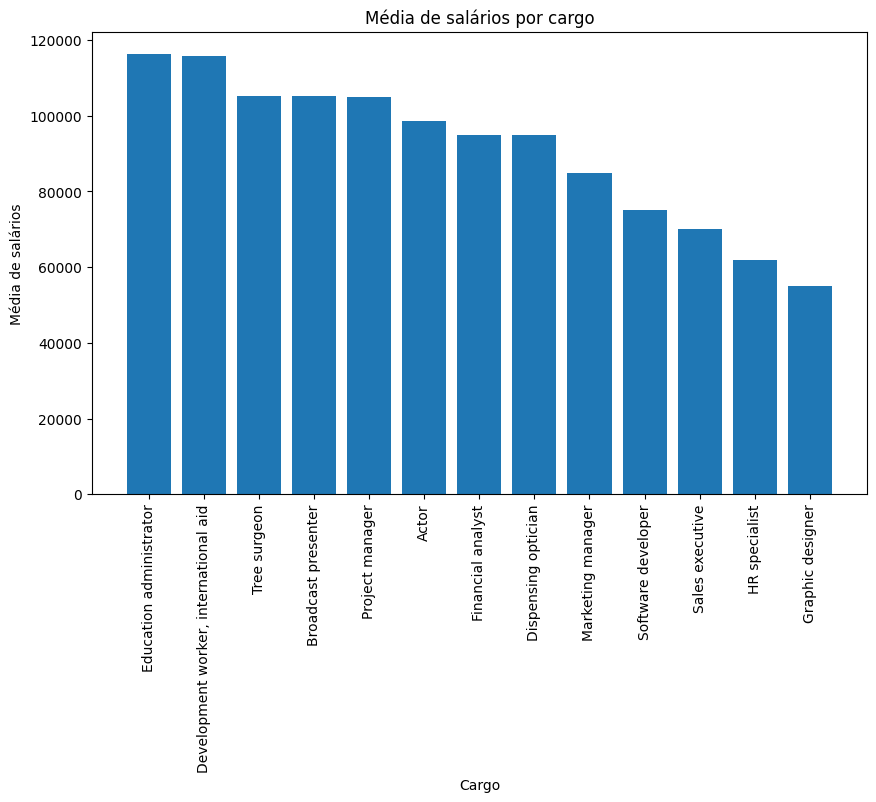

In [ ]:
# Criando um gráfico da média de salários por cargo
plt.figure(figsize=(10,6))
plt.bar(media_salarios_df['cargo'], media_salarios_df['media_salarios'])
plt.xlabel('Cargo')
plt.ylabel('Média de salários')
plt.xticks(rotation=90)
plt.title('Média de salários por cargo')
plt.savefig('media_de_salarios_por_cargos.png')
plt.show()

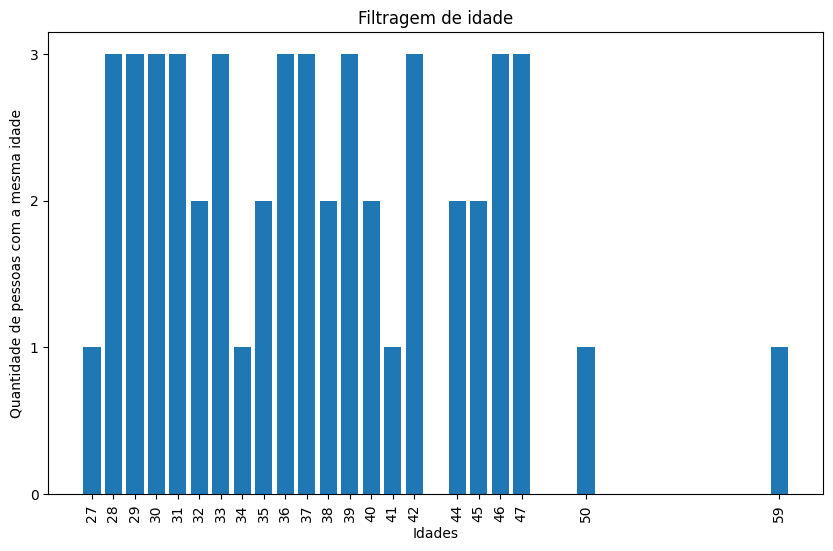

In [ ]:
from matplotlib.ticker import MaxNLocator

# Criando um gráfico de pessoas por idade

plt.figure(figsize=(10,6))
plt.bar(idade_contagem['idade'], idade_contagem['count'])
plt.xlabel('Idades')
plt.ylabel('Quantidade de pessoas com a mesma idade')
plt.xticks(idade_contagem['idade'], rotation=90)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Filtragem de idade')
plt.savefig('filtragem_idade.png')
plt.show()

In [ ]:
# Salvar os resultados em um novo arquivo Excel

with pd.ExcelWriter("analise_funcionarios.xlsx") as writer:
  spark_df.toPandas().to_excel(writer, sheet_name='Funcionarios, cargos e salários', index=False)
  media_salarios_df.to_excel(writer, sheet_name='Média de salário por cargo', index=False)
  idade_contagem.to_excel(writer, sheet_name='Contagem por idade', index=False)

  print("Arquivo Excel 'Analise_funcionarios.xlsx' criado com sucesso!")


Arquivo Excel 'Analise_funcionarios.xlsx' criado com sucesso!
